In [1]:
import pandas as pd

In [2]:
muts_df = pd.read_pickle("./data/1_df.pkl")

In [3]:
muts_df["exp ALE"] = muts_df.apply(lambda m: m["exp"] + " " + str(m["ale"]),axis = 1)

## Remove problem and starting strain mutations

In [4]:
muts_df = muts_df[~(
# For whatever reason, the gene annotations can change between version of breseq or runs
#     ((muts_df.Gene == "gatC")
#      | (muts_df.Gene == "gatC, gatC"))
    ((muts_df.Position == 2173361)
       | (muts_df.Position == 2173363)
       | (muts_df.Position == 2173364))
    & ((muts_df["Sequence Change"] == "Δ2 bp")
       | (muts_df["Sequence Change"] == "Δ1 bp"))
)]

muts_df = muts_df[~(
#     (muts_df.Gene == "[crl]")  # For whatever reason, the gene annotations can change between version of breseq or runs
    (muts_df.Position == 257908)
    & (muts_df["Sequence Change"] == "Δ776 bp"))]

muts_df = muts_df[~(
#     (muts_df.Gene == "insB1, insA")  # For whatever reason, the gene annotations can change between version of breseq or runs
    (muts_df.Position == 1978503)
    & (muts_df["Sequence Change"] == "Δ776 bp"))]

muts_df = muts_df[~(
#     (muts_df.Gene == "ychE, oppA")  # For whatever reason, the gene annotations can change between version of breseq or runs
    (muts_df.Position == 1299499)
    & (muts_df["Sequence Change"] == "Δ1,199 bp"))]

muts_df = muts_df[~(
# For whatever reason, the gene annotations can change between version of breseq or runs
#     ((muts_df.Gene == "glpR")
#      | (muts_df.Gene == "glpR, glpR")
#      | (muts_df.Gene == "glpR/glpR"))
    (muts_df.Position == 3560455)
    & (muts_df["Sequence Change"] == "+G"))]

muts_df = muts_df[~(
#     (muts_df.Gene == "gltP, yjcO")  # For whatever reason, the gene annotations can change between version of breseq or runs
    (muts_df.Position == 4296381)
    & (muts_df["Sequence Change"] == "+GC"))]

muts_df = muts_df[~(
#     (muts_df.Gene == "gltP, yjcO")  # For whatever reason, the gene annotations can change between version of breseq or runs
    (muts_df.Position == 4296380)
    & (muts_df["Sequence Change"] == "+CG"))]

muts_df = muts_df[~(
#     (muts_df.Gene == "insB1,insA")  # For whatever reason, the gene annotations can change between version of breseq or runs
    (muts_df.Position == 1978503)
    & (muts_df["Sequence Change"] == "Δ776 bp"))]

muts_df = muts_df[~(
#     ((muts_df.Gene == "insA/uspC") | (muts_df.Gene == "insA, uspC"))  # For whatever reason, the gene annotations can change between version of breseq or runs
    (muts_df.Position == 1979486)
    & (muts_df["Sequence Change"] == "IS5 (+) +4 bp"))]


muts_df = muts_df[~(
#     (muts_df.Gene == "corA")  # For whatever reason, the gene annotations can change between version of breseq or runs
    (muts_df.exp != "GLU")  # This is the ALE that originated the corA mutation that is found in all CCK samples, therefore should track
    & (muts_df.Position == 4001645)
    & (muts_df["Sequence Change"] == "Δ5 bp"))]


muts_df = muts_df[~(
#     (muts_df.Gene == "wcaA")  # For whatever reason, the gene annotations can change between version of breseq or runs
    (muts_df.exp != "GLU")  # This is the ALE that originated the corA mutation that is found in all CCK samples, therefore should track
    & (muts_df.Position == 2132787)
    & (muts_df["Details"] == "I204S (ATC→AGC)"))]


p = {4293212, 4293403, 4293430, 4296060, 4296154, 4296189,
 4296190, 4296191, 4296267, 4296268, 4296286, 4296380, 4296382}
ch = {'+C', '+G', 'A→C', 'A→G', 'A→T', 'C→A', 'C→T', 'T→C'}
muts_df = muts_df[~(
#     (muts_df.Gene == "gltP, yjcO")
    (muts_df["Position"].isin(p))
    & (muts_df["Sequence Change"].isin(ch))
       )]

display(len(muts_df), muts_df.head())

17509

exp  ale  flask  isolate  tech_rep  presence  Position  \
6   MG1655_untreated    1     16        0         1      1.00   1397381   
14  MG1655_untreated    1     16        0         1      0.61   4542237   
6   MG1655_untreated    2     16        0         1      1.00   1397381   
11  MG1655_untreated    2     16        0         1      0.22   4542456   
12  MG1655_untreated    2     16        0         1      0.21   4542831   

   Mutation Type Sequence Change                  Details  \
6            DEL      Δ13,756 bp                            
14           MOB   IS1 (+) +9 bp  coding (201‑209/597 nt)   
6            DEL      Δ13,756 bp                            
11           MOB   IS1 (+) +9 bp  coding (420‑428/597 nt)   
12           MOB   IS5 (+) +4 bp   intergenic (+198/‑281)   

                                                 Gene Reference Seq  \
6   [ynaJ],uspE,fnr,ogt,abgT,abgB,abgA,abgR,mcaS,s...     NC_000913   
14                                               fimE     NC_000913   
6   [ynaJ],uspE,fnr,ogt,abgT,abgB,abgA,abgR,mcaS,s...     NC_000913   
11                                               fimE     NC_000913   
12                                         fimE, fimA     NC_000913   

                       sample sample type             exp ALE  
6   MG1655_untreated 1 16 0 1  population  MG1655_untreated 1  
14  MG1655_untreated 1 16 0 1  population  MG1655_untreated 1  
6   MG1655_untreated 2 16 0 1  population  MG1655_untreated 2  
11  MG1655_untreated 2 16 0 1  population  MG1655_untreated 2  
12  MG1655_untreated 2 16 0 1  population  MG1655_untreated 2

In [5]:
reduced_ecoli_ale = 'application_of_ALE_to_re-optimize_growth_performance_of_genome-reduced_strain_MS56-M9-MG1655gbk'
MG1655_pBGT_untreated = "MG1655-pBGT_untreated"
MG1655_untreated = "MG1655_untreated"
MG1655_blaTEM1_untreated = "MG1655-blaTEM1_untreated"
muts_to_remove = [
    {"experiment":MG1655_blaTEM1_untreated,"position":1397381,"sequence change":"Δ13,756 bp"},
    {"experiment":MG1655_untreated,"position":1397381,"sequence change":"Δ13,756 bp"},
    {"experiment":MG1655_pBGT_untreated,"position":1397381,"sequence change":"Δ13,756 bp"},
    {"experiment":reduced_ecoli_ale,"position":389898,"sequence change":"Δ9,908 bp"},
    {"experiment":reduced_ecoli_ale,"position":1388889,"sequence change":"Δ9,734 bp"},
    {"experiment":reduced_ecoli_ale,"position":2466545,"sequence change":"Δ9,634 bp"},
    {"experiment":reduced_ecoli_ale,"position":729365,"sequence change":"Δ9,598 bp"},
    {"experiment":reduced_ecoli_ale,"position":3815859,"sequence change":"Δ82 bp"},
    {"experiment":reduced_ecoli_ale,"position":1400325,"sequence change":"Δ81,931 bp"},
    {"experiment":reduced_ecoli_ale,"position":380112,"sequence change":"Δ8,537 bp"},
    {"experiment":reduced_ecoli_ale,"position":2509631,"sequence change":"Δ8,319 bp"},
    {"experiment":reduced_ecoli_ale,"position":3761993,"sequence change":"Δ8,250 bp"},
    {"experiment":reduced_ecoli_ale,"position":257908,"sequence change":"Δ776 bp"},
    {"experiment":reduced_ecoli_ale,"position":1978503,"sequence change":"Δ776 bp"},
    {"experiment":reduced_ecoli_ale,"position":1040502,"sequence change":"Δ73,763 bp"},
    {"experiment":reduced_ecoli_ale,"position":3090347,"sequence change":"Δ708 bp"},
    {"experiment":reduced_ecoli_ale,"position":675552,"sequence change":"Δ7,819 bp"},
    {"experiment":reduced_ecoli_ale,"position":4400289,"sequence change":"Δ7 bp"},
    {"experiment":reduced_ecoli_ale,"position":819776,"sequence change":"Δ62,977 bp"},
    {"experiment":reduced_ecoli_ale,"position":263514,"sequence change":"Δ61,897 bp"},
    {"experiment":reduced_ecoli_ale,"position":3184782,"sequence change":"Δ6,916 bp"},
    {"experiment":reduced_ecoli_ale,"position":997868,"sequence change":"Δ6,818 bp"},
    {"experiment":reduced_ecoli_ale,"position":2558699,"sequence change":"Δ6,790 bp"},
    {"experiment":reduced_ecoli_ale,"position":3618992,"sequence change":"Δ6,688 bp"},
    {"experiment":reduced_ecoli_ale,"position":4496676,"sequence change":"Δ53,036 bp"},
    {"experiment":reduced_ecoli_ale,"position":167484,"sequence change":"Δ5,964 bp"},
    {"experiment":reduced_ecoli_ale,"position":603467,"sequence change":"Δ5,885 bp"},
    {"experiment":reduced_ecoli_ale,"position":3362162,"sequence change":"Δ5,481 bp"},
    {"experiment":reduced_ecoli_ale,"position":765208,"sequence change":"Δ5,405 bp"},
    {"experiment":reduced_ecoli_ale,"position":15389,"sequence change":"Δ5,175 bp"},
    {"experiment":reduced_ecoli_ale,"position":1509562,"sequence change":"Δ46,201 bp"},
    {"experiment":reduced_ecoli_ale,"position":332366,"sequence change":"Δ44,951 bp"},
    {"experiment":reduced_ecoli_ale,"position":4555491,"sequence change":"Δ41,523 bp"},
    {"experiment":reduced_ecoli_ale,"position":508873,"sequence change":"Δ40,744 bp"},
    {"experiment":reduced_ecoli_ale,"position":1223090,"sequence change":"Δ4 bp"},
    {"experiment":reduced_ecoli_ale,"position":2101397,"sequence change":"Δ36,321 bp"},
    {"experiment":reduced_ecoli_ale,"position":2756160,"sequence change":"Δ35,091 bp"},
    {"experiment":reduced_ecoli_ale,"position":2204350,"sequence change":"Δ32,368 bp"},
    {"experiment":reduced_ecoli_ale,"position":2994992,"sequence change":"Δ3,877 bp"},
    {"experiment":reduced_ecoli_ale,"position":2286401,"sequence change":"Δ3,780 bp"},
    {"experiment":reduced_ecoli_ale,"position":1997112,"sequence change":"Δ26,567 bp"},
    {"experiment":reduced_ecoli_ale,"position":1197137,"sequence change":"Δ25,940 bp"},
    {"experiment":reduced_ecoli_ale,"position":4299628,"sequence change":"Δ25,538 bp"},
    {"experiment":reduced_ecoli_ale,"position":1627518,"sequence change":"Δ25,244 bp"},
    {"experiment":reduced_ecoli_ale,"position":565055,"sequence change":"Δ21,054 bp"},
    {"experiment":reduced_ecoli_ale,"position":2846301,"sequence change":"Δ20,968 bp"},
    {"experiment":reduced_ecoli_ale,"position":3651293,"sequence change":"Δ2,422 bp"},
    {"experiment":reduced_ecoli_ale,"position":2173363,"sequence change":"Δ2 bp"},
    {"experiment":reduced_ecoli_ale,"position":3888432,"sequence change":"Δ18,167 bp"},
    {"experiment":reduced_ecoli_ale,"position":1962566,"sequence change":"Δ16,764 bp"},
    {"experiment":reduced_ecoli_ale,"position":2320144,"sequence change":"Δ16,489 bp"},
    {"experiment":reduced_ecoli_ale,"position":3453928,"sequence change":"Δ15,926 bp"},
    {"experiment":reduced_ecoli_ale,"position":2601201,"sequence change":"Δ13,595 bp"},
    {"experiment":reduced_ecoli_ale,"position":2165151,"sequence change":"Δ12,060 bp"},
    {"experiment":reduced_ecoli_ale,"position":1129397,"sequence change":"Δ11,591 bp"},
    {"experiment":reduced_ecoli_ale,"position":3593299,"sequence change":"Δ10 bp"},
    {"experiment":reduced_ecoli_ale,"position":3720634,"sequence change":"Δ1,442 bp"},
    {"experiment":reduced_ecoli_ale,"position":1872030,"sequence change":"Δ1,437 bp"},
    {"experiment":reduced_ecoli_ale,"position":1299499,"sequence change":"Δ1,199 bp"},
    {"experiment":reduced_ecoli_ale,"position":687860,"sequence change":"Δ1,185 bp"},
    {"experiment":reduced_ecoli_ale,"position":3581139,"sequence change":"3915 bp→6 bp"},
    {"experiment":reduced_ecoli_ale,"position":1197137,"sequence change":"25956 bp→12 bp"},
    {"experiment":reduced_ecoli_ale,"position":3110680,"sequence change":"25702 bp→GA"},
]

In [6]:
for mut in muts_to_remove:
    muts_df = muts_df[~(
        (muts_df["exp"] == mut["experiment"])
        & (muts_df["Position"] == mut["position"])
        & (muts_df["Sequence Change"] == mut["sequence change"])
    )]
display(len(muts_df), muts_df.head())

16143

exp  ale  flask  isolate  tech_rep  presence  Position  \
14  MG1655_untreated    1     16        0         1      0.61   4542237   
11  MG1655_untreated    2     16        0         1      0.22   4542456   
12  MG1655_untreated    2     16        0         1      0.21   4542831   
8   MG1655_untreated    3     16        0         1      0.49   4542191   
9   MG1655_untreated    3     16        0         1      0.33   4542298   

   Mutation Type Sequence Change                  Details        Gene  \
14           MOB   IS1 (+) +9 bp  coding (201‑209/597 nt)        fimE   
11           MOB   IS1 (+) +9 bp  coding (420‑428/597 nt)        fimE   
12           MOB   IS5 (+) +4 bp   intergenic (+198/‑281)  fimE, fimA   
8            SNP             A→C           D52A (GAC→GCC)        fimE   
9            MOB   IS1 (+) +8 bp  coding (262‑269/597 nt)        fimE   

   Reference Seq                     sample sample type             exp ALE  
14     NC_000913  MG1655_untreated 1 16 0 1  population  MG1655_untreated 1  
11     NC_000913  MG1655_untreated 2 16 0 1  population  MG1655_untreated 2  
12     NC_000913  MG1655_untreated 2 16 0 1  population  MG1655_untreated 2  
8      NC_000913  MG1655_untreated 3 16 0 1  population  MG1655_untreated 3  
9      NC_000913  MG1655_untreated 3 16 0 1  population  MG1655_untreated 3

## Remove experiment specific starting strain mutations

In [7]:
# Filter the following mutations out if they come from specific experiments.
muts_df = muts_df[(~((muts_df.exp=="SER") & (muts_df["Gene"]=="cyoB") & (muts_df["Details"]=="W190* (TGG→TAG)")))]
muts_df = muts_df[(~((muts_df.exp=="SER") & (muts_df["Gene"]=="eno") & (muts_df["Details"]=="L193Q (CTG→CAG)")))]
muts_df = muts_df[(~((muts_df.exp=="SER") & (muts_df["Gene"]=="chbF") & (muts_df["Details"]=="V133E (GTA→GAA)")))]
muts_df = muts_df[(~((muts_df.exp=="SER") & (muts_df["Gene"]=="fumC") & (muts_df["Details"]=="G354G (GGT→GGC)")))]
muts_df = muts_df[(~((muts_df.exp=="SER") & (muts_df["Gene"]=="yegE") & (muts_df["Details"]=="S683Y (TCC→TAC)")))]
muts_df = muts_df[(~((muts_df.exp=="SER") & (muts_df["Gene"]=="rcsC") & (muts_df["Details"]=="L594F (TTG→TTC)")))]


muts_df = muts_df[(~((muts_df.exp=="GYD") & (muts_df["Gene"]=="fumC") & (muts_df["Details"]=="G354G (GGT→GGC)")))]
muts_df = muts_df[(~((muts_df.exp=="GYD") & (muts_df["Gene"]=="yegE") & (muts_df["Details"]=="S683Y (TCC→TAC)")))]
muts_df = muts_df[(~((muts_df.exp=="GYD") & (muts_df["Gene"]=="rcsC") & (muts_df["Details"]=="L594F (TTG→TTC)")))]


cck_exp_list = [
    "tpi",
    "pts",
    "pgi",
    "sdh",
    "gnd",
    "evo"
]

muts_df = muts_df[~(
    (muts_df.exp.isin(cck_exp_list))
    & (
        (muts_df["Gene"]=="wcaA")
        | (muts_df["Gene"]=="corA")
    )
)]  # The details of the mutations to filter out should probably include the sequence change.
print(len(muts_df))

15939


### Removing starting strain mutations represented in the "MG1655_anchestor" samples

In [8]:
# to use with filtering out mutations 
muts_df = muts_df.reset_index(drop=True)

In [9]:
# Not many. Going to manual remove (see cell below)
# This is for the Ecoli_resistance_caz
# Sebastian often uses the name "MG1655_anchestor" 
MG1655_anchestor = muts_df[muts_df.exp=="MG1655_anchestor"].copy()
MG1655_anchestor

exp  ale  flask  isolate  tech_rep  presence  Position  \
14989  MG1655_anchestor    0      0        1         1       1.0   4390754   
14990  MG1655_anchestor    0      0        1         1       1.0    803662   
14991  MG1655_anchestor    0      0        1         1       1.0   1905761   

      Mutation Type Sequence Change          Details  Gene Reference Seq  \
14989           SNP             G→T  A252A (GCC→GCA)  rsgA     NC_000913   
14990           SNP             C→A   L54I (CTT→ATT)  ybhJ     NC_000913   
14991           SNP             G→A   G25D (GGT→GAT)  mntP     NC_000913   

                         sample sample type             exp ALE  
14989  MG1655_anchestor 0 0 1 1       clone  MG1655_anchestor 0  
14990  MG1655_anchestor 0 0 1 1       clone  MG1655_anchestor 0  
14991  MG1655_anchestor 0 0 1 1       clone  MG1655_anchestor 0

In [10]:
print(len(muts_df))
muts_df = muts_df[~(muts_df.index.isin(list(MG1655_anchestor.index)))]
print(len(muts_df))

15939
15936


In [11]:
muts_df = muts_df[(~((muts_df.exp=="MG1655_chloramphenicol") & (muts_df["Position"]==4390754) & (muts_df["Details"]=="A252A (GCC→GCA)")))]
muts_df = muts_df[(~((muts_df.exp=="MG1655_chloramphenicol") & (muts_df["Position"]==803662) & (muts_df["Details"]=="L54I (CTT→ATT)")))]
muts_df = muts_df[(~((muts_df.exp=="MG1655_chloramphenicol") & (muts_df["Position"]==1905761) & (muts_df["Details"]=="G25D (GGT→GAT)")))]

muts_df = muts_df[(~((muts_df.exp=="MG1655_doxycycline") & (muts_df["Position"]==4390754) & (muts_df["Details"]=="A252A (GCC→GCA)")))]
muts_df = muts_df[(~((muts_df.exp=="MG1655_doxycycline") & (muts_df["Position"]==803662) & (muts_df["Details"]=="L54I (CTT→ATT)")))]
muts_df = muts_df[(~((muts_df.exp=="MG1655_doxycycline") & (muts_df["Position"]==1905761) & (muts_df["Details"]=="G25D (GGT→GAT)")))]

muts_df = muts_df[(~((muts_df.exp=="MG1655_trimethoprim") & (muts_df["Position"]==4390754) & (muts_df["Details"]=="A252A (GCC→GCA)")))]
muts_df = muts_df[(~((muts_df.exp=="MG1655_trimethoprim") & (muts_df["Position"]==803662) & (muts_df["Details"]=="L54I (CTT→ATT)")))]
muts_df = muts_df[(~((muts_df.exp=="MG1655_trimethoprim") & (muts_df["Position"]==1905761) & (muts_df["Details"]=="G25D (GGT→GAT)")))]
print(len(muts_df))

15879


Though the other Ecoli_resistance_caz experiments have "anchestor" data on the aledb.ucsd.edu server, their mutations aren't uploaded, therefore not going to filter anything from them at this point.

### Starting strain mutations according to samples within experiments with starting strain AFIRs

In [12]:
# to use with filtering out mutations 
muts_df = muts_df.reset_index(drop=True)

In [13]:
# Remove starting strain mutations from all experiments according to each experiment's starting strain

def _get_sample_name(ale, flask, isolate, tech_rep):  # Doesn't include the experiment name
    sample_name = str(int(ale)) + " " + str(int(flask)) + " " + str(int(isolate)) + " " + str(int(tech_rep))
    return sample_name

muts_df["sample"] = muts_df.apply(lambda r: _get_sample_name(r.ale, r.flask, r.isolate, r.tech_rep), axis=1)
muts_df

muts_df = muts_df.copy()
starting_strains = muts_df[muts_df["sample"]=="0 0 1 1"]  # Need an exact match
muts_df = muts_df[muts_df["sample"]!="0 0 1 1"]  # remove starting strain samples
for e, exp_starting_strain_muts in starting_strains.groupby("exp"):
    rows_to_filter = (
        muts_df["exp"].isin(exp_starting_strain_muts["exp"])
        & muts_df["Position"].isin(exp_starting_strain_muts["Position"])
        & muts_df["Sequence Change"].isin(exp_starting_strain_muts["Sequence Change"])
        & muts_df["Details"].isin(exp_starting_strain_muts["Details"])
    )
    muts_df.drop(muts_df[rows_to_filter].index, inplace=True)  # have to ensure that muts_df indeces are unique

The following value is used in the gdmuts MS paper as the full set of observed mutations with all starting strain mutations and other artifacts filtered out.

In [14]:
print(len(muts_df))

13957


###  Check that no weird mutations references are included in dataset, since they won't match to RegulonDB's data

In [15]:
for ref_seq, df in muts_df.groupby("Reference Seq"):
    print(ref_seq, df.exp.unique())

CP009273 ['TOL_isobutyric_acid']
NC_000913 ['MG1655_untreated' 'Iron-ALE'
 'MG1655-M9-NC_000913_3gb-stationary-37-monomethyl_succinate2'
 'gallium-nitrate' 'TOL_adipic_acid' 'MG1655-blaTEM1_untreated' 'tpiKO'
 'TOL_n-butanol' 'pvdJ_KO_P_aeruginosa_spent_medium' 'TOL_octanoic_acid'
 'TOL_glutaric_acid'
 'MG1655-M9-NC_000913_3gb-stationary-37-D-2-deoxyribose2'
 'MG1655-M9-NC_000913_3gb-stationary-37-D-lyxose2' 'TOL_putrescine'
 'WT_P_aeruginosa_spent_medium' 'EG_pCA24N-fucO'
 'TOL_hexamethylenediamine' 'MG1655_doxycycline' 'evo'
 'JCL260__isobutanol_production_host-M9-MG1655gbk'
 'MG1655-M9-NC_000913_3gb-stationary-37-D-arabinose2' 'TOL_propanediol'
 'TOL_2,3-butanediol' 'sdh' 'GLU' 'MG1655_trimethoprim'
 'MG1655-pBGT_ceftazidime' 'TOL_hexanoic_acid' 'wt'
 'application_of_ALE_to_re-optimize_growth_performance_of_genome-reduced_strain_MS56-M9-MG1655gbk'
 'pyocyanin_supplemented_medium' 'MG1655_ceftazidime' 'OxidizeME_PQ3'
 'tpi' 'MG1655_chloramphenicol' 'TOL_coumaric_acid' 'TOL_isobutyric

According the the prevous results, TOL_isobutyric_acid has one weird mutation. Going to remove it.

In [16]:
muts_df = muts_df[muts_df["Reference Seq"] != "CP009273"]
muts_df["Reference Seq"].unique()

array(['NC_000913', nan, 'NC_000913_3_pae_tpiA', 'NC_000913_3_vch_tpiA',
       'NC_000913_3_bme_pgi', 'NC_000913_3_hsa_tpiA',
       'NC_000913_3_hsa_pgi', 'NC_000913_3_vch_pgi',
       'NC_000913_3_pae_pgi', 'NC_000913_3_KO_pgi'], dtype=object)

In [17]:
# Check which experiments have "nan" for reference sequence
muts_df[muts_df["Reference Seq"].isna()]["exp"].unique()
# Those given are older experiments that we know were resequenced with NC_000913 version 3, though were integrated into ALEdb before we were tracking the reference sequence in its database.

array(['42C', 'PGI', 'SSW_GLU_XYL', 'SER', 'SSW_GLU_AC', 'SSW_AC',
       'SSW_GLU_GLY', 'SSW_GLY', 'SSW_XYL', 'C13'], dtype=object)

In [18]:
# removing samples not incuded in GYD MS for AVA MS

muts_df = muts_df[
    ~(
        (muts_df.exp == "GYD")
        & ((muts_df.ale == 35) | (muts_df.ale == 34))
    )
]
print(len(muts_df.apply(lambda r: r.exp + " " + str(r.ale), axis=1).unique()))

386


In [19]:
# This work is also currently duplicated NB4. Keep the implementation here and remove the code from NB4
muts_df["Gene"] = muts_df["Gene"].apply(lambda a: "rph" if a == "[rph], [rph]" else a)
muts_df["Gene"] = muts_df["Gene"].apply(lambda a: "rph" if a == "[rph],[rph]" else a)
muts_df.head()

exp  ale  flask  isolate  tech_rep  presence  Position  \
0  MG1655_untreated    1     16        0         1      0.61   4542237   
1  MG1655_untreated    2     16        0         1      0.22   4542456   
2  MG1655_untreated    2     16        0         1      0.21   4542831   
3  MG1655_untreated    3     16        0         1      0.49   4542191   
4  MG1655_untreated    3     16        0         1      0.33   4542298   

  Mutation Type Sequence Change                  Details        Gene  \
0           MOB   IS1 (+) +9 bp  coding (201‑209/597 nt)        fimE   
1           MOB   IS1 (+) +9 bp  coding (420‑428/597 nt)        fimE   
2           MOB   IS5 (+) +4 bp   intergenic (+198/‑281)  fimE, fimA   
3           SNP             A→C           D52A (GAC→GCC)        fimE   
4           MOB   IS1 (+) +8 bp  coding (262‑269/597 nt)        fimE   

  Reference Seq    sample sample type             exp ALE  
0     NC_000913  1 16 0 1  population  MG1655_untreated 1  
1     NC_000913  2 16 0 1  population  MG1655_untreated 2  
2     NC_000913  2 16 0 1  population  MG1655_untreated 2  
3     NC_000913  3 16 0 1  population  MG1655_untreated 3  
4     NC_000913  3 16 0 1  population  MG1655_untreated 3

# Filtering out hypermutator ALEs

In [20]:
import os, sys, itertools, csv

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from mutil.mut import get_clean_mut_gene_list, is_coding_mut
from mutil.alemutdf import get_multi_exp_max_freq_mut_df

In [21]:
muts_df["coding"] = muts_df.Details.apply(is_coding_mut)
muts_df["Gene"] = muts_df.apply(lambda row: row["Gene"].replace(", ","/") if not row["coding"] else row["Gene"], axis=1)

muts_df.head()

exp  ale  flask  isolate  tech_rep  presence  Position  \
0  MG1655_untreated    1     16        0         1      0.61   4542237   
1  MG1655_untreated    2     16        0         1      0.22   4542456   
2  MG1655_untreated    2     16        0         1      0.21   4542831   
3  MG1655_untreated    3     16        0         1      0.49   4542191   
4  MG1655_untreated    3     16        0         1      0.33   4542298   

  Mutation Type Sequence Change                  Details       Gene  \
0           MOB   IS1 (+) +9 bp  coding (201‑209/597 nt)       fimE   
1           MOB   IS1 (+) +9 bp  coding (420‑428/597 nt)       fimE   
2           MOB   IS5 (+) +4 bp   intergenic (+198/‑281)  fimE/fimA   
3           SNP             A→C           D52A (GAC→GCC)       fimE   
4           MOB   IS1 (+) +8 bp  coding (262‑269/597 nt)       fimE   

  Reference Seq    sample sample type             exp ALE  coding  
0     NC_000913  1 16 0 1  population  MG1655_untreated 1    True  
1     NC_000913  2 16 0 1  population  MG1655_untreated 2    True  
2     NC_000913  2 16 0 1  population  MG1655_untreated 2   False  
3     NC_000913  3 16 0 1  population  MG1655_untreated 3    True  
4     NC_000913  3 16 0 1  population  MG1655_untreated 3    True

In [22]:
# to normalize clones and populations, only keeping mutations with 100% frequency
print(len(muts_df))
clone_pop_norm_muts_df = muts_df[muts_df["presence"]==1]
print(len(clone_pop_norm_muts_df))

13941
13035


In [23]:
# Just checking the endpoint flasks for now. Currently assuming that hypermutators will always fix in an ALE.
# If this assumption proves inaccurate, can set endpoint_flask_only=False,though will take much longer.
ep_max_freq_mut_df = get_multi_exp_max_freq_mut_df(clone_pop_norm_muts_df, endpoint_flask_only=True)

In [24]:
# HYPERMUTATOR_GENES contains all synonyms for genes known to manifest hypermutator phenotypes after being mutated.
# This list of genes is from 10.1016/S0966-842X(98)01424-3 and synonyms were retrieved from ecocyc.
HYPERMUTATOR_GENES = {
    "mutD", "dnaQ", "mutS", "ant", "plm", "fdv",
    "mutL", "mutH", "mutR", "topB", "prv", 'uvrD',
    "uvr502", "srjC", "uvrE", "dar-2", "dda",
    "mutU", "pdeB", "rad", "recL", "mutM",
    "fpg", "mutY", "micA", "mutT", "nudA",
    "dnaE", "polC", "sdgC", 'polA', "resA",
    "mutA", "glyV", "mutC", "glyW", "ins",
    "dam", "miaA", "trpX", "sodA", "sodB",
    "oxyR"  # We've had this one mutate in ALE experiments and not cause hypermutation, so don't include unless also checking if ALE is an outlier with mutation counts
    "nth", "nei", "xthA", "xth", "nfo",
    "ung", "vsr", "ada", "ogt", "recA",
    "zab", "umuB", "tif", "lexB", "recH", "rnmB", "srf",
    "recG", "radC", "spoV", "ssb", "exrB", "lexC"
    "hns"  # We've had this one mutate in ALE experiments and not cause hypermutation, so don't include unless also checking if ALE is an outlier with mutation counts
}


# def _get_mutated_hypermutator_genes(mutated_genes_str):  # currently checking annotation that could contain an incomplete set of affected genes. Would be more accurate to use positions.
def _get_mutated_hypermutator_genes(m):
    mutated_hypermutator_genes = set()
    if m["coding"]: # Mutation affect a gene's nucleotides
        mutated_genes_str = m["Gene"]
        mutated_genes = set(get_clean_mut_gene_list(mutated_genes_str))
        mutated_hypermutator_genes = mutated_genes & HYPERMUTATOR_GENES
    return mutated_hypermutator_genes


assert(_get_mutated_hypermutator_genes({"coding": True, "Gene": "asdf, zxcv"}) == set())
assert(_get_mutated_hypermutator_genes({"coding": False, "Gene": "asdf, zxcv, mutL"}) == set())
assert(_get_mutated_hypermutator_genes({"coding": True, "Gene": "asdf, zxcv, mutL"}) == {"mutL"})
assert(_get_mutated_hypermutator_genes({"coding": True, "Gene": "mutA, asdf, zxcv, mutL"}) == {"mutA", "mutL"})
assert(_get_mutated_hypermutator_genes({"coding": True, "Gene": "asdf, zxcv, insB-5"}) == set())  # "ins" is a hypermutator genes; ensure that substrings aren't being identified as hypermutator genes with "insB-5".
assert(_get_mutated_hypermutator_genes({"coding": True, "Gene": '[ynaJ],uspE,fnr,ogt,abgT,abgB,abgA,abgR,mcaS,smrA,dgcM,zntB,fnrS,ynaL,dbpA,[ttcA]'}) == {"ogt"})  # testing complicated annotation string

ep_max_freq_mut_df["hypermutator gene hit"] = ep_max_freq_mut_df.apply(lambda m: ', '.join(_get_mutated_hypermutator_genes(m)), axis=1)

In [25]:
# This cell just for plotting number of mutations per hypermutator gene


from collections import Counter


hyp_mut_gene_cnt_d = Counter(ep_max_freq_mut_df[ep_max_freq_mut_df["hypermutator gene hit"]!='']["hypermutator gene hit"])  # can count like this since only looking at unique enpoint mutations
hyp_mut_gene_cnt_df = pd.DataFrame.from_dict(hyp_mut_gene_cnt_d, orient="index", columns=["mutation count"])
hyp_mut_gene_cnt_df = hyp_mut_gene_cnt_df.sort_values(by="mutation count")
display(hyp_mut_gene_cnt_df["mutation count"].sum())
hyp_mut_gene_cnt_df.head()


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


hyp_mut_genes = list(hyp_mut_gene_cnt_df.index)
hyp_mut_gene_cnts = list(hyp_mut_gene_cnt_df["mutation count"])


fig = go.Figure(data=[go.Bar(
    x=hyp_mut_gene_cnts,
    y=hyp_mut_genes,
    orientation='h',
    text=hyp_mut_gene_cnts,
    textposition='auto',
    marker=dict(
        color='#768281',
    )
)])

title_text = "Hypermutator gene mutation counts ("+ str(hyp_mut_gene_cnt_df["mutation count"].sum()) + " total)<br>from Public ALEdb<i> E. coli</i> K-12 MG1655 experiment"

fig.update_layout(
    title={
        'text': title_text,
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    template="plotly_white",
    autosize=False,
    width=650,
    height=1000,
    font=dict(
        family="Helvetica",
        color="black",
        size=18,
    )
)

fig.update_xaxes(title_text = "mutation count")

fig.update_yaxes(title_text = "hypermutator genes")

fig.show()

82

In [26]:
# For use with building distribution to find outliers
exp_ale_mut_cnt_df = pd.DataFrame()
for exp, exp_mut_df in ep_max_freq_mut_df.groupby("exp"):
    for exp_ale, ale_df in exp_mut_df.groupby("exp ALE"):
        exp_ale_mut_cnt_df = exp_ale_mut_cnt_df.append({"experiment": exp, "exp ALE": exp_ale, "mutation count": len(ale_df)}, ignore_index=True)

Text(0.5, 0, 'ALE replicate mutation count')

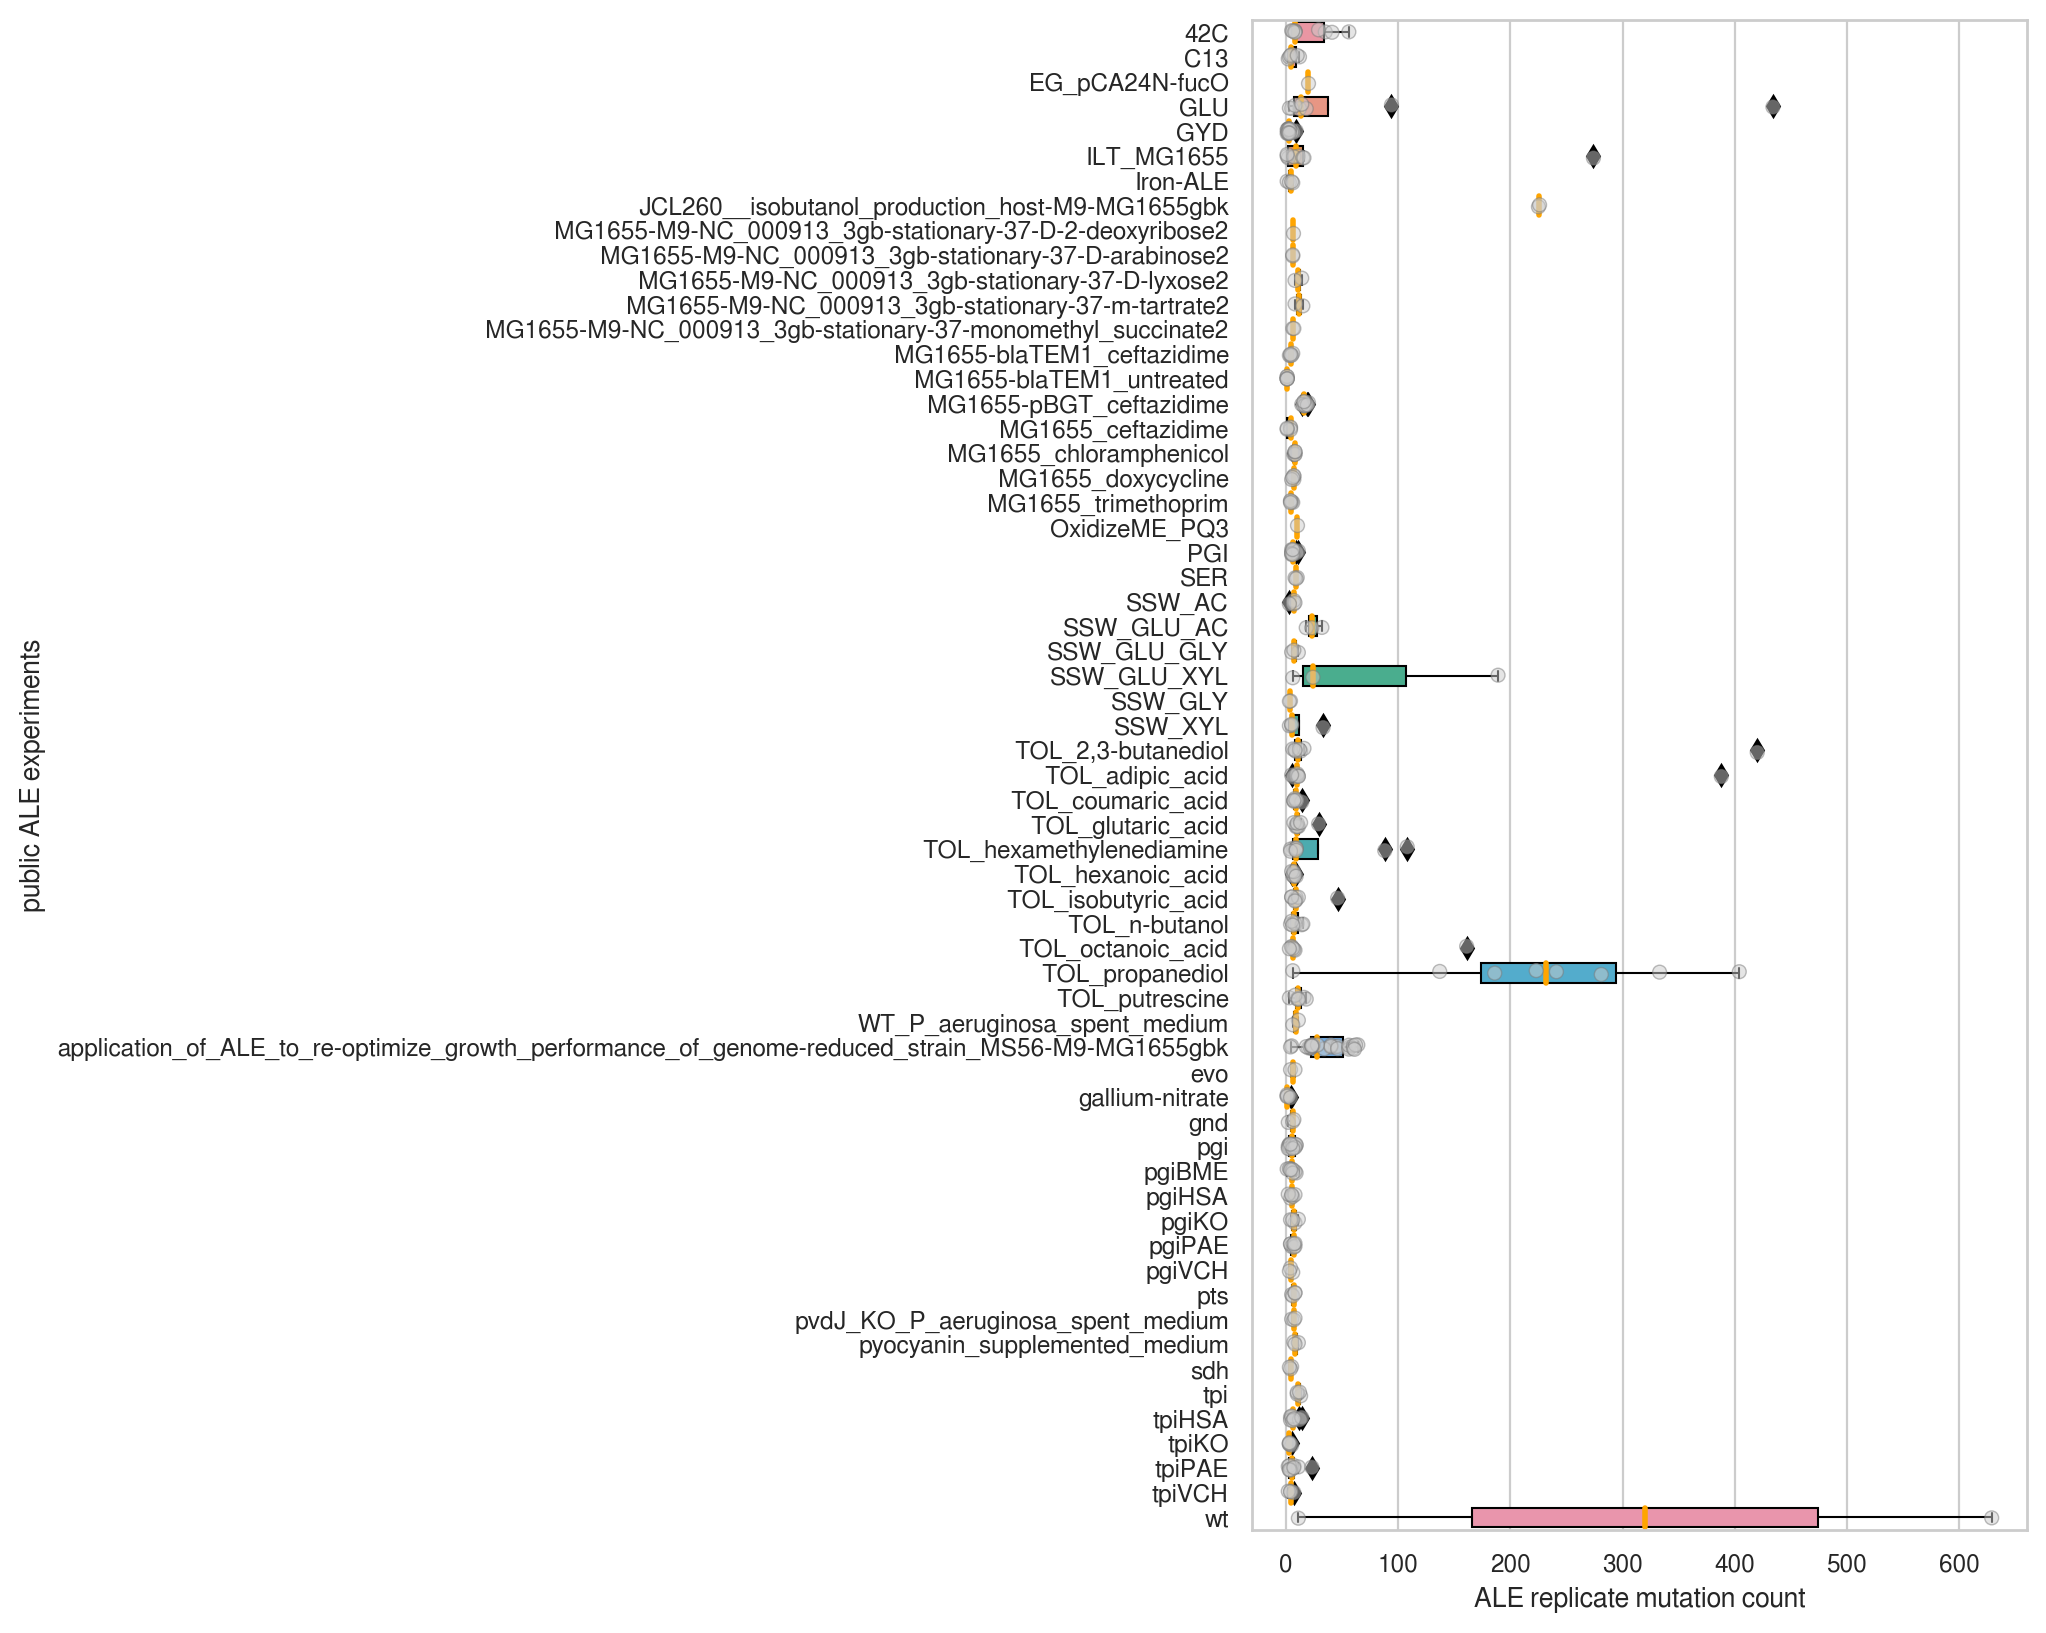

In [27]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_palette("muted")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'orange', 'linewidth': 2},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': 'd', 'markerfacecolor': "black", 'markeredgecolor': "black"}
}


plt.figure(figsize=(5, 10))
ax = sns.boxplot(
    data=exp_ale_mut_cnt_df,
    y="experiment",
    x="mutation count",
    **boxplot_kwargs
)
ax = sns.stripplot(
    data=exp_ale_mut_cnt_df,
    y="experiment",
    x="mutation count",
    color="0.8",
    alpha=0.5,
    linewidth=0.5,
)
# ax.set_xscale('log')
# plt.title('Some replicate ALEs have a very large number of\n100% presence mutations relative to others')
plt.ylabel('public ALE experiments')
plt.xlabel('ALE replicate mutation count')

median number of clonal mutations per ALE: 7.0


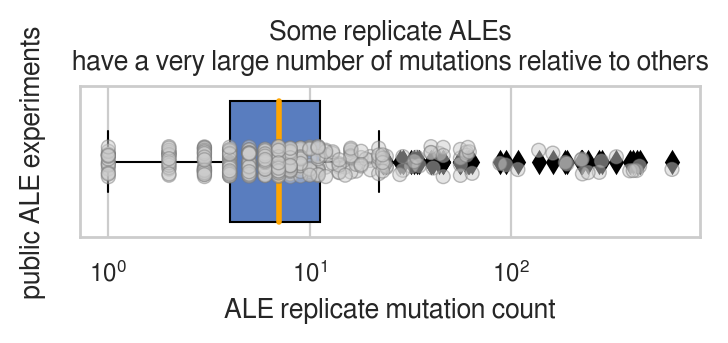

In [28]:
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_palette("muted")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'orange', 'linewidth': 2},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': 'd', 'markerfacecolor': "black", 'markeredgecolor': "black"}
}


plt.figure(figsize=(4, 1))
ax = sns.boxplot(
    data=exp_ale_mut_cnt_df,
    x="mutation count",
    **boxplot_kwargs
)
ax = sns.stripplot(
    data=exp_ale_mut_cnt_df,
    x="mutation count",
    color="0.8",
    alpha=0.5,
    linewidth=0.5,
)
ax.set_xscale('log')
plt.title('Some replicate ALEs\nhave a very large number of mutations relative to others')
plt.ylabel('public ALE experiments')
plt.xlabel('ALE replicate mutation count')

print("median number of clonal mutations per ALE: " + str(np.median(exp_ale_mut_cnt_df["mutation count"])))

In [29]:
from matplotlib.cbook import boxplot_stats
outlier_mut_cnts= boxplot_stats(exp_ale_mut_cnt_df["mutation count"]).pop(0)['fliers']  # should return something about outliers, though I forget what
outlier_mut_cnts

array([ 35.,  29.,  41.,  56.,  94., 434., 274., 225., 226.,  32.,  23.,
       189.,  24.,  33., 420., 388.,  29.,  88., 108.,  46., 161., 333.,
       223., 404., 137., 186., 281., 241.,  23.,  40.,  44.,  40.,  46.,
        34.,  40.,  46.,  56.,  56.,  56.,  64.,  60.,  60.,  62.,  61.,
        24.,  23.,  24.,  28.,  23.,  23.,  23., 629.])

In [30]:
outlier_mut_count_ALEs = set(exp_ale_mut_cnt_df[exp_ale_mut_cnt_df["mutation count"].isin(outlier_mut_cnts)]["exp ALE"])
ALEs_with_hyp_mut_gene = set(ep_max_freq_mut_df[ep_max_freq_mut_df["hypermutator gene hit"]!='']["exp ALE"].unique())
pred_hyp_mut_ALEs = ALEs_with_hyp_mut_gene & outlier_mut_count_ALEs
pred_hyp_mut_ALEs

{'42C 2',
 '42C 3',
 '42C 6',
 '42C 8',
 'GLU 3',
 'GLU 7',
 'ILT_MG1655 4',
 'JCL260__isobutanol_production_host-M9-MG1655gbk 2',
 'SSW_GLU_XYL 1',
 'SSW_XYL 4',
 'TOL_2,3-butanediol 3',
 'TOL_adipic_acid 5',
 'TOL_glutaric_acid 7',
 'TOL_hexamethylenediamine 4',
 'TOL_hexamethylenediamine 6',
 'TOL_octanoic_acid 5',
 'TOL_propanediol 1',
 'TOL_propanediol 2',
 'TOL_propanediol 3',
 'TOL_propanediol 4',
 'TOL_propanediol 5',
 'TOL_propanediol 7',
 'TOL_propanediol 8',
 'tpiPAE 18',
 'wt 1'}

In [31]:
ep_max_freq_mut_df["predicted hypermutator ALE"] = ep_max_freq_mut_df.apply(lambda m: m["exp ALE"] in pred_hyp_mut_ALEs, axis=1)
all_hyp_mut_ALEs = ep_max_freq_mut_df[ep_max_freq_mut_df["predicted hypermutator ALE"]]["exp ALE"].unique()
all_hyp_mut_ALEs

array(['42C 2', '42C 3', '42C 6', '42C 8', 'GLU 3', 'GLU 7',
       'ILT_MG1655 4',
       'JCL260__isobutanol_production_host-M9-MG1655gbk 2',
       'SSW_GLU_XYL 1', 'SSW_XYL 4', 'TOL_2,3-butanediol 3',
       'TOL_adipic_acid 5', 'TOL_glutaric_acid 7',
       'TOL_hexamethylenediamine 4', 'TOL_hexamethylenediamine 6',
       'TOL_octanoic_acid 5', 'TOL_propanediol 1', 'TOL_propanediol 2',
       'TOL_propanediol 3', 'TOL_propanediol 4', 'TOL_propanediol 5',
       'TOL_propanediol 7', 'TOL_propanediol 8', 'tpiPAE 18', 'wt 1'],
      dtype=object)

In [32]:
exp_hypermut_ale_frac_df = pd.DataFrame()
for exp, exp_mut_df in ep_max_freq_mut_df.groupby("exp"):
    exp_outlier_ale_fraction = 0
    exp_ale_cnt = len(exp_mut_df["exp ALE"].unique())
    exp_hyp_ale_cnt = len(exp_mut_df[exp_mut_df["predicted hypermutator ALE"]]["exp ALE"].unique())
    if exp_hyp_ale_cnt > 0:
        exp_outlier_ale_fraction = exp_hyp_ale_cnt / exp_ale_cnt
    srs = pd.Series({"experiment": exp, "experiment ALE hypermutator fraction": exp_outlier_ale_fraction})
    exp_hypermut_ale_frac_df = exp_hypermut_ale_frac_df.append(srs, ignore_index=True)
exp_hypermut_ale_frac_df[exp_hypermut_ale_frac_df["experiment ALE hypermutator fraction"]!=0]

experiment  \
0                                               42C   
3                                               GLU   
5                                        ILT_MG1655   
7   JCL260__isobutanol_production_host-M9-MG1655gbk   
26                                      SSW_GLU_XYL   
28                                          SSW_XYL   
29                               TOL_2,3-butanediol   
30                                  TOL_adipic_acid   
32                                TOL_glutaric_acid   
33                         TOL_hexamethylenediamine   
37                                TOL_octanoic_acid   
38                                  TOL_propanediol   
58                                           tpiPAE   
60                                               wt   

    experiment ALE hypermutator fraction  
0                               0.400000  
3                               0.250000  
5                               0.125000  
7                               0.500000  
26                              0.333333  
28                              0.250000  
29                              0.125000  
30                              0.125000  
32                              0.125000  
33                              0.250000  
37                              0.142857  
38                              0.875000  
58                              0.100000  
60                              0.500000

Text(0.5, 1.0, "Most experiments\ndon't manifest hypermutators strains")

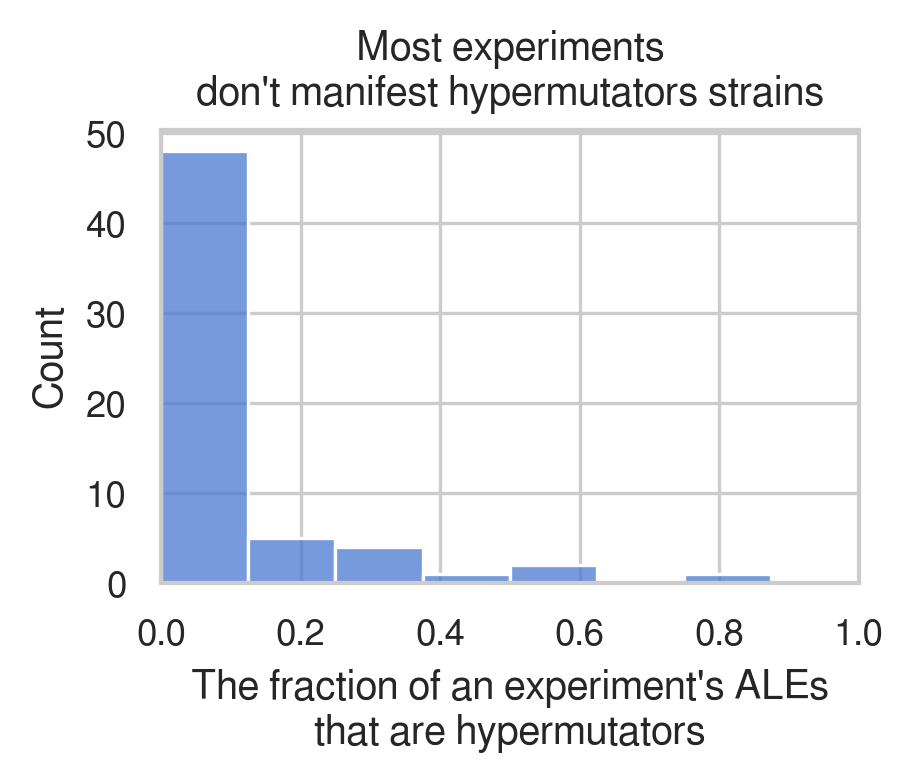

In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_palette("muted")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'orange', 'linewidth': 2},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': 'd', 'markerfacecolor': "black", 'markeredgecolor': "black"}
}

plt.figure(figsize=(3, 2))
ax = sns.histplot(data=exp_hypermut_ale_frac_df,
            x="experiment ALE hypermutator fraction",
           )

ax.set_xlabel("The fraction of an experiment's ALEs\nthat are hypermutators")
ax.set_xlim(0, 1)
ax.set_title("Most experiments\ndon't manifest hypermutators strains")

Text(0.5, 0, 'ALE replicate mutation count')

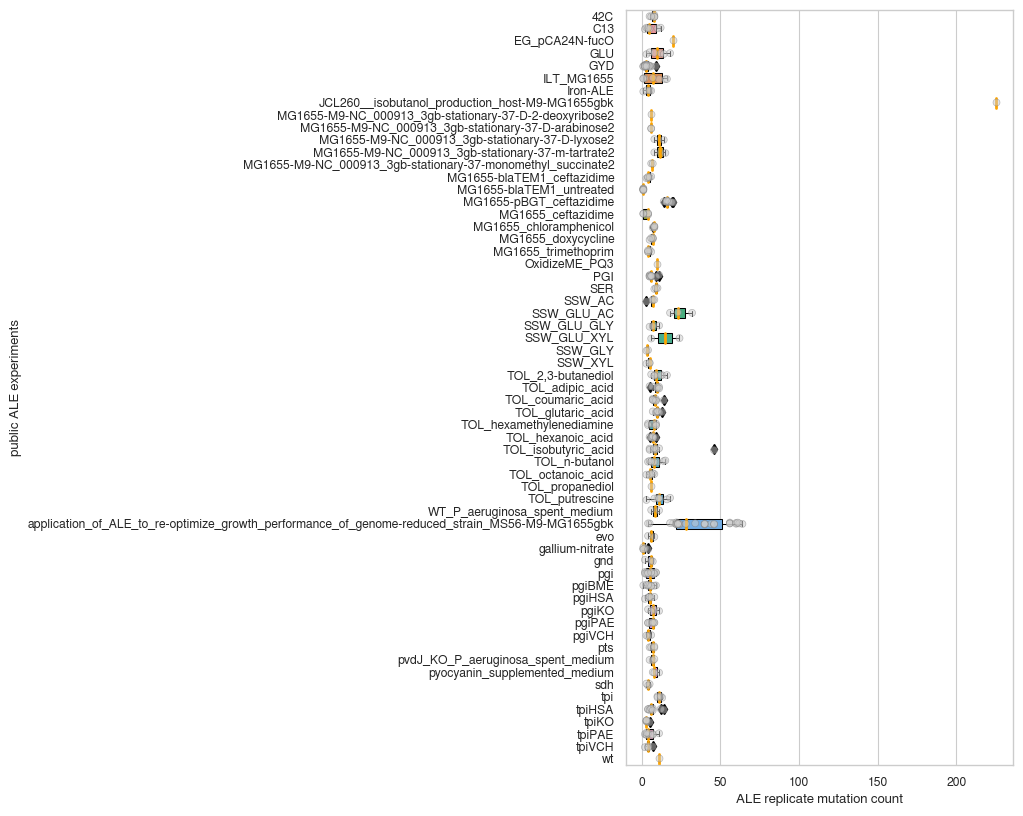

In [34]:
# Just to see the effects of the hypermutator removal

no_hyp_ep_max_freq_mut_df = ep_max_freq_mut_df[~(ep_max_freq_mut_df["exp ALE"].isin(all_hyp_mut_ALEs))]  # removing hypermutator ALEs
no_hyp_ale_exp_mut_cnt_df = pd.DataFrame()
for _, g in no_hyp_ep_max_freq_mut_df.groupby(["exp ALE"]):
    no_hyp_ale_exp_mut_cnt_df = no_hyp_ale_exp_mut_cnt_df.append({
        "experiment": g.iloc[0]["exp"],
        "experiment ALE": g.iloc[0]["exp ALE"],
        "mutation count": len(g)
    }, ignore_index=True)


import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_palette("muted")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'orange', 'linewidth': 2},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': 'd', 'markerfacecolor': "black", 'markeredgecolor': "black"}
}


plt.figure(figsize=(5, 10))
ax = sns.boxplot(
    data=no_hyp_ale_exp_mut_cnt_df,
    y="experiment",
    x="mutation count",
    **boxplot_kwargs
)
ax = sns.stripplot(
    data=no_hyp_ale_exp_mut_cnt_df,
    y="experiment",
    x="mutation count",
    color="0.8",
    alpha=0.5,
    linewidth=0.5,
)
# ax.set_xscale('log')
plt.ylabel('public ALE experiments')
plt.xlabel('ALE replicate mutation count')

In [35]:
muts_df = muts_df[~(muts_df["exp ALE"].isin(all_hyp_mut_ALEs))]  # removing hypermutator ALEs for output

## With hypermutator ALEs removed from the dataset, directly filter mutation dataframe to be output.

In [36]:
print(len(muts_df))
muts_df = muts_df[muts_df.presence >= 0.5]
print(len(muts_df))

6697
6206


In [37]:
# Just get ALE-unique mutations. Do as much mutation filtering as possible running this to cut down the runtime on the finding ALE-unique mutations.
print(len(muts_df))
muts_df = get_multi_exp_max_freq_mut_df(muts_df, endpoint_flask_only=False)
print(len(muts_df))
muts_df.head()

6206
3921


exp  ale  flask  isolate  tech_rep  presence  Position Mutation Type  \
9   42C    1    124        1         1       1.0    702352           DEL   
10  42C    1    124        1         1       1.0   1308318           SNP   
11  42C    1    124        1         1       1.0   3815859           DEL   
12  42C    1    124        1         1       1.0   4187550           SNP   
13  42C    1    124        1         1       1.0   4400313           SNP   

   Sequence Change                   Details  Gene Reference Seq     sample  \
9           Δ21 bp  coding (380‑400/1149 nt)  nagA           NaN  1 124 1 1   
10             G→C           R110G (CGT→GGT)  clsA           NaN  1 124 1 1   
11          Δ82 bp                             rph           NaN  1 124 1 1   
12             C→T           A734V (GCG→GTG)  rpoC           NaN  1 124 1 1   
13             A→C             D9A (GAT→GCT)   hfq           NaN  1 124 1 1   

   sample type exp ALE  coding  
9        clone   42C 1    True  
10       clone   42C 1    True  
11       clone   42C 1    True  
12       clone   42C 1    True  
13       clone   42C 1    True

In [38]:
muts_df.to_pickle("./data/1_1_df.pkl")